# Random Forest Regression

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,Afghanistan,SouthernAsia,17.0,83.5,4.0,44.9,19.788235,32.217647,20.400000,32.400000,...,36.800000,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,Albania,SouthernEurope,18.6,107.3,17.9,18.7,50.100000,43.500000,58.870588,85.400000,...,95.100000,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,Algeria,NorthernAfrica,31.0,113.0,8.9,28.7,23.100000,17.000000,65.900000,79.500000,...,91.623529,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,Angola,MiddleAfrica,8.6,105.9,3.6,47.1,17.911765,31.111765,37.011765,66.811765,...,40.270588,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,Argentina,SouthAmerica,23.7,111.2,14.9,25.2,65.994118,46.700000,77.464706,91.358824,...,110.200000,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574


In [3]:
df = df.drop('country', axis = 1)
df_copy = pd.get_dummies(df)
y = df['happiness.score']
X = df_copy.drop('happiness.score', axis=1)
X_list = list(X.columns)

## Extract Response and Predictors

In [4]:
df

,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)","Life expectancy at birth (males, years)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,SouthernAsia,17.0,83.5,4.0,44.9,19.788235,32.217647,20.400000,32.400000,60.9,...,36.800000,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,SouthernEurope,18.6,107.3,17.9,18.7,50.100000,43.500000,58.870588,85.400000,75.2,...,95.100000,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,NorthernAfrica,31.0,113.0,8.9,28.7,23.100000,17.000000,65.900000,79.500000,74.4,...,91.623529,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,MiddleAfrica,8.6,105.9,3.6,47.1,17.911765,31.111765,37.011765,66.811765,55.2,...,40.270588,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,SouthAmerica,23.7,111.2,14.9,25.2,65.994118,46.700000,77.464706,91.358824,72.2,...,110.200000,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,SouthAmerica,26.8,98.6,9.9,27.6,69.900000,97.500000,77.900000,95.000000,69.9,...,93.000000,13.8,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250
298,South-easternAsia,22.9,108.4,11.1,23.1,69.700000,94.400000,96.900000,99.100000,70.7,...,92.311765,19.3,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074
299,WesternAsia,17.9,88.9,4.6,39.9,34.100000,92.500000,46.500000,72.000000,62.8,...,39.500000,47.2,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593
300,EasternAfrica,9.9,104.0,3.7,44.8,35.700000,55.600000,51.300000,85.600000,57.5,...,37.982353,53.8,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514


# 1. Model with All Independent Variables

In [5]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

# Extract features and lables 
# X = df.iloc [:,2:24]
# y = df.iloc[:,24:]

X = np.array(X)
y = np.array(y)

## Training and Testing Sets

In [6]:
#Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print()

X_train: (241, 41)
X_test: (61, 41)
y_train: (241,)
y_test: (61,)



## Establish Baseline

In [7]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, X_list.index('GDP per capita (current US$)')]


# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))
print()


Average baseline error:  11735.93



## Train Model

In [8]:
#Fitting the data
regressor = RandomForestRegressor (n_estimators = 100, random_state = 0)
regressor.fit (X_train,y_train)

RandomForestRegressor(random_state=0)

## Make Predictions on Test Data

In [9]:
#Predicting the test set results 
y_pred = regressor.predict(X_test)


#Performance metrics 
errors = abs (y_pred - y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Mean absolute error:', round(np.mean(errors), 2))
print()

Metrics for Random Forest Trained on Expanded Data
Mean absolute error: 0.38



## Determine Performance Metrics

In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print('Accuracy_2:', regressor.score(X_train, y_train))
print()

Accuracy: 92.09 %.
Accuracy_2: 0.9754663081726076



## Error checking

In [11]:
#Error checking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error (y_test, y_pred)
r_square = r2_score (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print('Mean Absolute Error (MAE)\t:', mae )
print('Mean Absolute Percentage Error (MAPE)\t:',mape)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print('R-Square Error\t:', r_square)



Mean Absolute Error (MAE)	: 0.3757734432864164
Mean Absolute Percentage Error (MAPE)	: 0.07910534833379348
Mean Squared Error (MSE) 	: 0.2285317524726718
Root Mean Squared Error (RMSE) 	: 0.4780499476756292
R-Square Error	: 0.8004694188826306


In [12]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,3.808,4.35056
1,4.644,5.05812
2,5.902,5.68698
3,4.120,4.43468
4,4.857,5.50052
...,...,...
56,5.360,4.93853
57,3.875,4.16279
58,6.670,6.10540
59,5.102,5.57177



## Visualizing a Decision Tree

In [13]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# df_copy = df.drop(['happiness.score', 'country', 'Region'], axis = 1)
# df_list = list(df_copy.columns)
# Pull out one tree from the forest
tree = regressor.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


# import image module
from IPython.display import Image
  
# get the image
Image(url="tree.png", width=2500, height=1800)

### Smaller tree visualization (depth = 3)

In [14]:
# Limit depth of tree to 3 levels
regressor_small = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state = 0)
regressor_small.fit(X_train,y_train)

# Extract the small tree
tree_small = regressor_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# import image module
from IPython.display import Image
  
# get the image
Image(url="small_tree.png", width=1000, height=800)

### Smaller tree visualization (depth = 5)

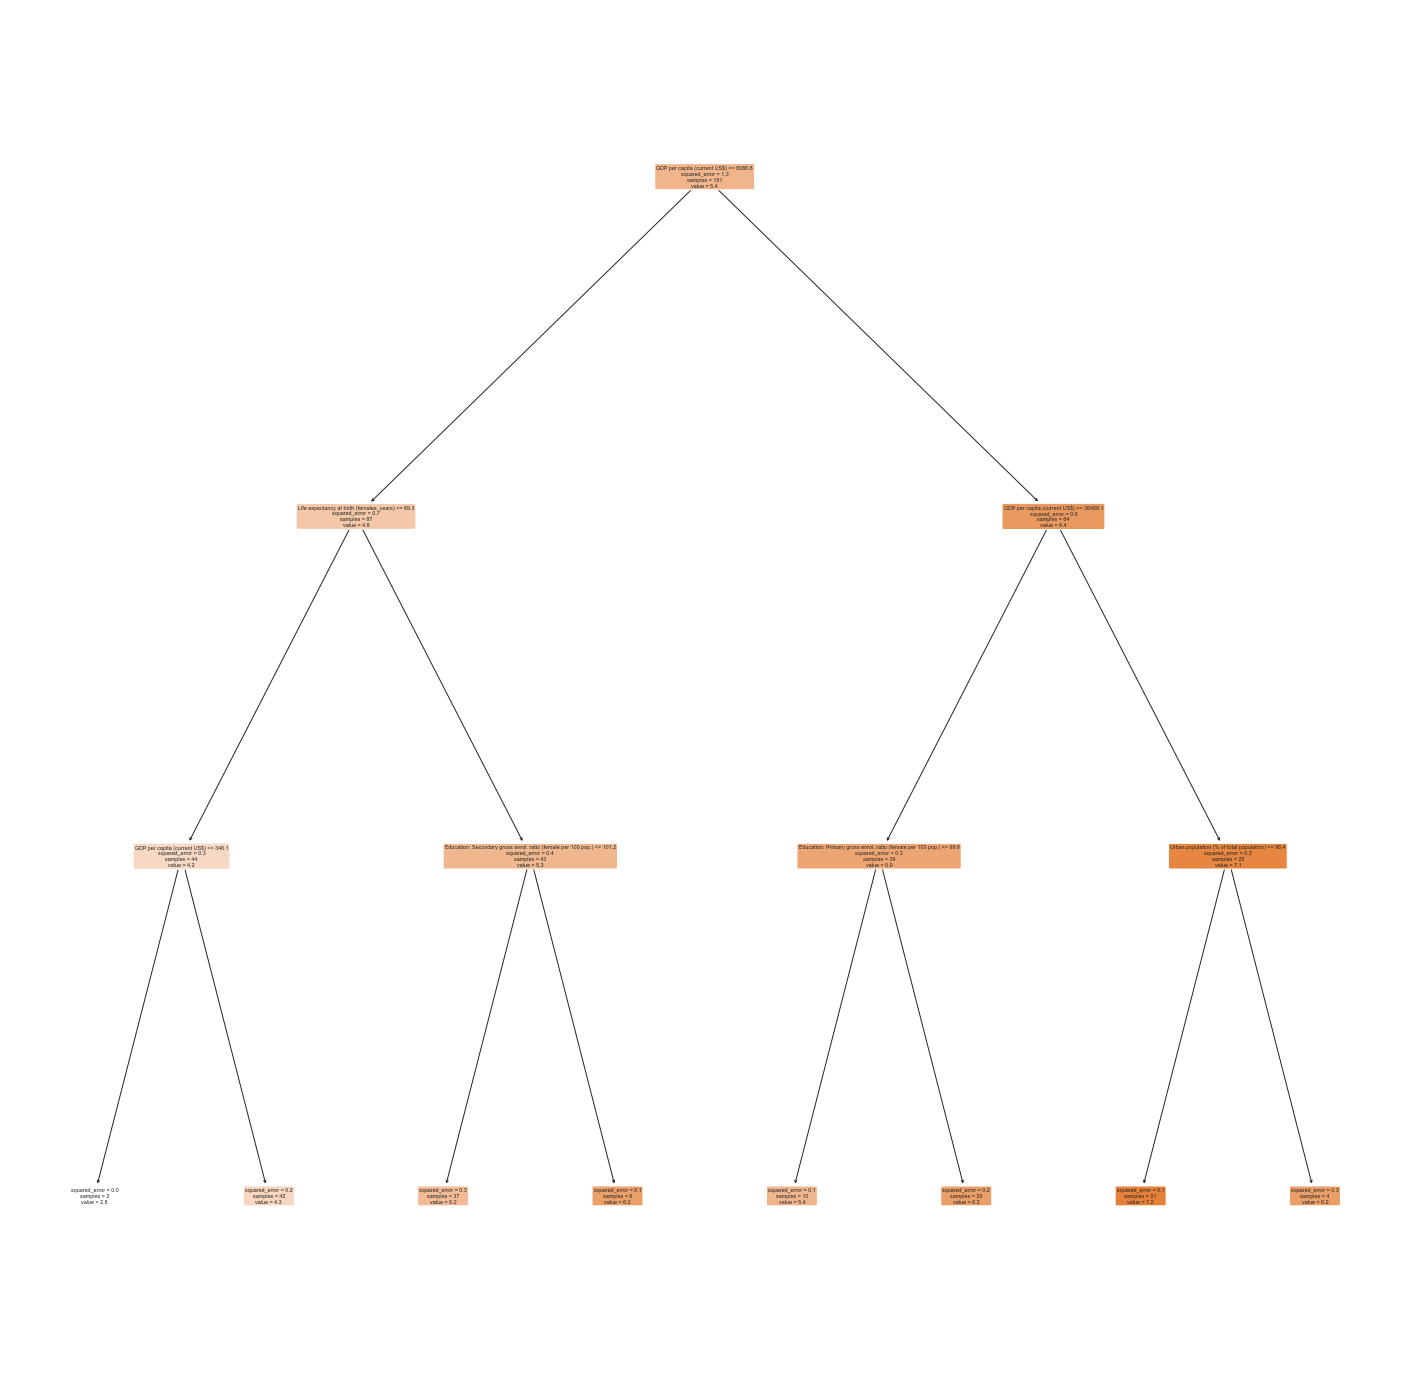

In [15]:
from sklearn import tree
from sklearn import datasets
# Limit depth of tree to 3 levels
regressor_small = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state = 0)
regressor_small.fit(X_train,y_train)

# Extract the small tree
tree_small = regressor_small.estimators_[5]
fig = plt.figure(figsize=(25,25))
# Save the tree as a png image
_ = tree.plot_tree(tree_small, filled=True,feature_names = X_list, rounded = True, precision = 1)



In [16]:
# Limit depth of tree to 3 levels
regressor_small = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state = 0)
regressor_small.fit(X_train,y_train)

# Extract the small tree
tree_small = regressor_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_2.dot', feature_names = X_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree_2.dot')
graph.write_png('small_tree_2.png');

# import image module
from IPython.display import Image
  
# get the image
Image(url="small_tree_2.png", width=3000, height=10000)

### Variable Importances

In [17]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GDP per capita (current US$) Importance: 0.52
Variable: Life expectancy at birth (males, years) Importance: 0.08
Variable: Life expectancy at birth (females, years) Importance: 0.08
Variable: Education: Secondary gross enrol. ratio (female per 100 pop.) Importance: 0.06
Variable: Infant mortality rate (per 1000 live births Importance: 0.03
Variable: Urban population (% of total population) Importance: 0.03
Variable: Education: Primary gross enrol. ratio (female per 100 pop.) Importance: 0.02
Variable: Population age distribution (0-14 years, %) Importance: 0.02
Variable: Education: Secondary gross enrol. ratio (male per 100 pop.) Importance: 0.02
Variable: Employment: Agriculture (% of employed) Importance: 0.02
Variable: Individuals using the Internet (per 100 inhabitants) Importance: 0.02
Variable: Employment: Industry (% of employed) Importance: 0.01
Variable: Population age distribution (60+ years, %) Importance: 0.01
Variable: Pop. using improved sanitation facilities (r

## Variable Importances Visualizations

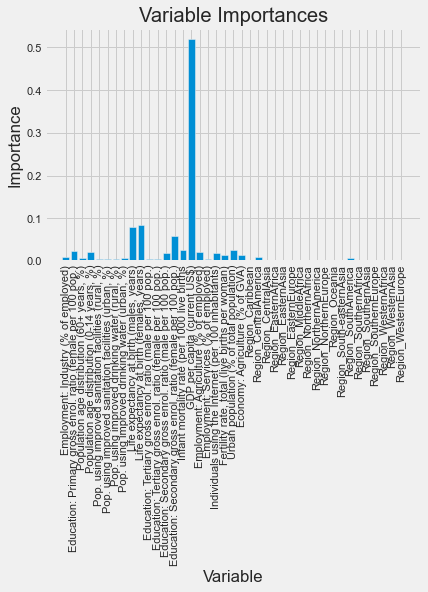

In [18]:


# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# 2. Model with Most Important Features

In [19]:
df = df.drop('Region', axis = 1)

In [20]:
# Extract features and lables 
y = df['happiness.score']
X = df[['GDP per capita (current US$)', 
        'Life expectancy at birth (males, years)',
        'Life expectancy at birth (females, years)',
        'Education: Secondary gross enrol. ratio (female per 100 pop.)',
       'Urban population (% of total population)',
       'Individuals using the Internet (per 100 inhabitants)',
       'Education: Primary gross enrol. ratio (female per 100 pop.)',
       'Population age distribution (0-14 years, %)',
       'Education: Secondary gross enrol. ratio (male per 100 pop.)',
       'Infant mortality rate (per 1000 live births',
       'Employment: Agriculture (% of employed)',
       'Infant mortality rate (per 1000 live births']]



                                 
X_list = list(X.columns)
X = np.array(X)
y = np.array(y)
#Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting the data
regressor = RandomForestRegressor (n_estimators = 100, random_state = 0)
regressor.fit (X_train,y_train)

#Predicting the test set results 
y_pred = regressor.predict(X_test)



# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print('Accuracy_2:', regressor.score(X_train, y_train))
print()



#Error checking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error (y_test, y_pred)
r_square = r2_score (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print('Metrics for Random Forest Trained on Expanded Data')
print('Mean Absolute Error (MAE)\t:', mae )
print('Mean Absolute Percentage Error (MAPE)\t:',mape)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print('R-Square Error\t:', r_square)

Accuracy: 92.09 %.
Accuracy_2: 0.9748109768204087

Metrics for Random Forest Trained on Expanded Data
Mean Absolute Error (MAE)	: 0.362124426283836
Mean Absolute Percentage Error (MAPE)	: 0.07560177393707664
Mean Squared Error (MSE) 	: 0.2245110683346927
Root Mean Squared Error (RMSE) 	: 0.47382598950953786
R-Square Error	: 0.803979869548064


In [21]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,3.808,4.29304
1,4.644,5.12529
2,5.902,5.69731
3,4.120,4.53431
4,4.857,5.77365
...,...,...
56,5.360,4.89275
57,3.875,4.00334
58,6.670,6.08398
59,5.102,5.53173


In [22]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GDP per capita (current US$) Importance: 0.53
Variable: Life expectancy at birth (males, years) Importance: 0.09
Variable: Life expectancy at birth (females, years) Importance: 0.09
Variable: Education: Secondary gross enrol. ratio (female per 100 pop.) Importance: 0.07
Variable: Urban population (% of total population) Importance: 0.04
Variable: Population age distribution (0-14 years, %) Importance: 0.04
Variable: Individuals using the Internet (per 100 inhabitants) Importance: 0.03
Variable: Education: Primary gross enrol. ratio (female per 100 pop.) Importance: 0.03
Variable: Education: Secondary gross enrol. ratio (male per 100 pop.) Importance: 0.03
Variable: Employment: Agriculture (% of employed) Importance: 0.03
Variable: Infant mortality rate (per 1000 live births Importance: 0.02
Variable: Infant mortality rate (per 1000 live births Importance: 0.02


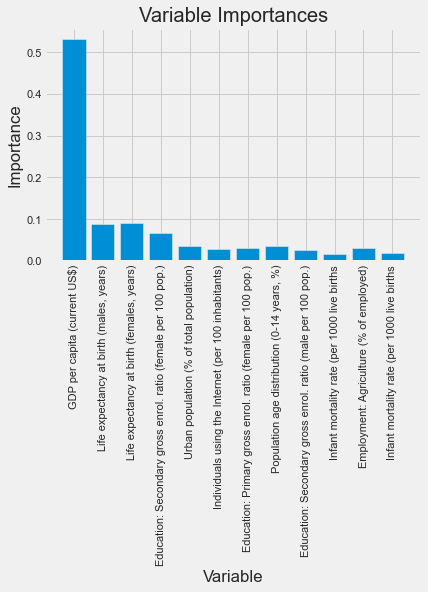

In [23]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values,X_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# 3. Model Based on Variables with Highest Correlation Values

In [24]:
# Extract features and lables 
y = df['happiness.score']
X = df[['Employment: Agriculture (% of employed)',
       'Life expectancy at birth (females, years)',
       'Employment: Services (% of employed)',
       'Population age distribution (60+ years, %)',
       'Education: Primary gross enrol. ratio (female per 100 pop.)']]



                                 
X_list = list(X.columns)
X = np.array(X)
y = np.array(y)
#Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Fitting the data
regressor = RandomForestRegressor (n_estimators = 100, random_state = 0)
regressor.fit (X_train,y_train)

#Predicting the test set results 
y_pred = regressor.predict(X_test)


#Performance metrics 
errors = abs (y_pred - y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Mean absolute error:', round(np.mean(errors), 2))
print()

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print('Accuracy_2:', regressor.score(X_train, y_train))
print()



#Error checking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error (y_test, y_pred)
r_square = r2_score (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print('Mean Absolute Error (MAE)\t:', mae )
print('Mean Absolute Percentage Error (MAPE)\t:',mape)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print('R-Square Error\t:', r_square)

Metrics for Random Forest Trained on Expanded Data
Mean absolute error: 0.47

Accuracy: 90.25 %.
Accuracy_2: 0.9689104512765421

Mean Absolute Error (MAE)	: 0.4692695010851246
Mean Absolute Percentage Error (MAPE)	: 0.09745755578976453
Mean Squared Error (MSE) 	: 0.3735269538581124
Root Mean Squared Error (RMSE) 	: 0.611168515107014
R-Square Error	: 0.6738744206881166


In [25]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,3.808,4.36330
1,4.644,5.03612
2,5.902,5.52423
3,4.120,4.40605
4,4.857,6.04674
...,...,...
56,5.360,5.22222
57,3.875,4.16715
58,6.670,6.18386
59,5.102,5.66427


### Conclusion
Model 2 is the best among the other two since it shows the lowest RMSE value and highest R^2 value. This means the variables chosen in model 2 are the most suitable to predict the happiness score value. 